In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import seaborn as sns
from nanonets import NanoparticleTunneling

plt.style.use(["science","bright","grid"])
# plt.style.use('seaborn-v0_8-whitegrid')

In [4]:
# Lattice
N_x, N_y        = 5,5
R_val1, R_val2  = 25.0, 100.0
N_particles     = N_x*N_y
electrode_pos   = [[0,N_y-1],[0,0],[N_x-1,0],[N_x//2,0],[N_x-1,N_y-1]]
voltage_values  = np.random.normal(size=len(electrode_pos)+1)
lattice_net     = NanoparticleTunneling()

# Build Network and attach Electrodes
lattice_net.lattice_network(N_x, N_y)
lattice_net.add_electrodes_to_lattice_net(electrode_pos)

# Electrostatics
lattice_net.add_np_to_output()
lattice_net.init_nanoparticle_radius()
lattice_net.pack_planar_circles()
lattice_net.calc_capacitance_matrix()
lattice_net.calc_electrode_capacitance_matrix()
lattice_net.init_charge_vector(voltage_values)

# Tunneling
lattice_net.init_adv_indices()
lattice_net.init_const_capacitance_values()
lattice_net.init_potential_vector(voltage_values)
lattice_net.init_junction_resistances(R=R_val1, Rstd=R_val1/5.0)
lattice_net.update_junction_resistances_at_random(N=N_particles//3, R=R_val2, Rstd=R_val2/5.0)
lattice_net.build_conductance_matrix()

In [5]:
src, tgt            = lattice_net.get_advanced_indices()
resistances         = lattice_net.get_resistance()
conductance_matrix  = lattice_net.get_conductance_matrix()

print(f"Origin í in Tunneling Event i->j\n {src}")
print(f"Target j in Tunneling Event i->j\n {tgt}")
print(f"Tunneling Event Resistances:\n {resistances}")
print(f"Conductance Matrix:\n {conductance_matrix}")

Origin í in Tunneling Event i->j
 [ 0  1  2  3  4  5  5  5  6  6  6  7  7  7  7  8  8  8  9  9  9 10 10 10
 11 11 11 11 12 12 12 12 13 13 13 13 14 14 14 15 15 15 16 16 16 16 17 17
 17 17 18 18 18 18 19 19 19 20 20 20 21 21 21 21 22 22 22 22 23 23 23 23
 24 24 24 25 25 25 26 26 26 27 27 27 28 28 28 29 29 29 30 30]
Target j in Tunneling Event i->j
 [25  5  9  7 30  1  6 10  5  7 11  3  6  8 12  7  9 13  2  8 14  5 11 15
  6 10 12 16  7 11 13 17  8 12 14 18  9 13 19 10 16 20 11 15 17 21 12 16
 18 22 13 17 19 23 14 18 24 15 21 25 16 20 22 26 17 21 23 27 18 22 24 28
 19 23 29  0 20 26 21 25 27 22 26 28 23 27 29 24 28 30  4 29]
Tunneling Event Resistances:
 [ 26.32264937  26.34764079  21.0625836   23.46603188  18.13394435
  26.34764079  34.20012656  24.24411381  34.20012656  20.73120669
  19.92399101  23.46603188  20.73120669  24.63948623  29.27313456
  24.63948623  61.41930953  29.08890878  21.0625836   61.41930953
  25.24770134  24.24411381  26.59073489  90.64589227  19.92399101
  26.59073

Text(0.5, 0, '$R$ [M$\\Omega$]')

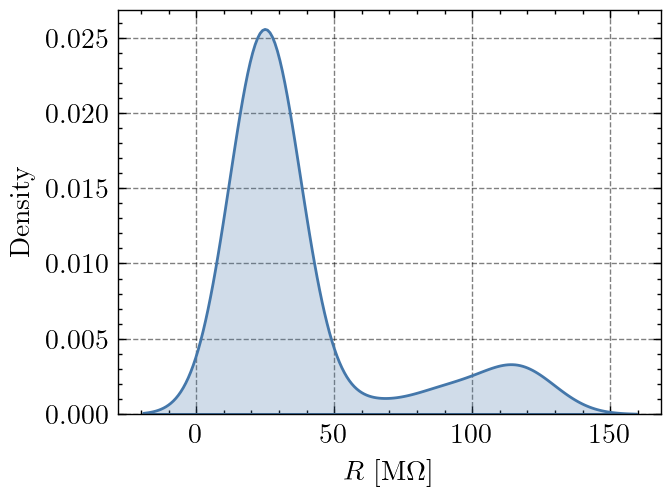

In [6]:
fig, ax = plt.subplots(dpi=200)
ax      = sns.kdeplot(resistances, ax=ax, fill=True)
ax.set_xlabel("$R$ [M$\Omega$]")